<a href="https://colab.research.google.com/github/Benjamin025/earth-engine-scripts/blob/main/Embeddings_Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import ee
import geemap as geemap
import xarray as xr

!pip install xee
import xee

!pip install rioxarray
import rioxarray



In [3]:
ee.Authenticate()
ee.Initialize(
    project = "ee-my-ndungu",
    opt_url='https://earthengine-highvolume.googleapis.com'
)

In [9]:
## Creating a region of interest
# map = geemap.Map(basemap = "SATELLITE", ee_initialize=False)
map = geemap.Map(basemap = "SATELLITE", ee_initialize=False)
map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [11]:
roi = map.draw_last_feature.geometry()
roi

ee.Geometry({
  "functionInvocationValue": {
    "functionName": "Feature.geometry",
    "arguments": {
      "feature": {
        "functionInvocationValue": {
          "functionName": "Feature",
          "arguments": {
            "geometry": {
              "functionInvocationValue": {
                "functionName": "GeometryConstructors.Polygon",
                "arguments": {
                  "coordinates": {
                    "constantValue": [
                      [
                        [
                          37.553329,
                          -0.961945
                        ],
                        [
                          37.553329,
                          -0.885051
                        ],
                        [
                          37.644653,
                          -0.885051
                        ],
                        [
                          37.644653,
                          -0.961945
                        ],
                        [
                          37.553329,
                          -0.961945
                        ]
                      ]
                    ]
                  },
                  "geodesic": {
                    "constantValue": false
                  }
                }
              }
            }
          }
        }
      }
    }
  }
})

In [12]:

image = (
    ee.ImageCollection("GOOGLE/SATELLITE_EMBEDDING/V1/ANNUAL")
    .filterDate("2023", "2025")
    .filterBounds(roi)
    .mosaic()

)
image

In [14]:
# converting the image to the python xarray for analysis
ds = xr.open_dataset(
    image,
    engine="ee",
    crs = "EPSG:4326",
    scale = 0.001, # 100m pixel resolution
    geometry = roi
    )
ds

<xarray.Dataset> Size: 2MB
Dimensions:  (time: 1, lon: 91, lat: 77)
Coordinates:
  * time     (time) int64 8B 0
  * lon      (lon) float64 728B 37.55 37.55 37.56 37.56 ... 37.64 37.64 37.64
  * lat      (lat) float64 616B -0.9614 -0.9604 -0.9594 ... -0.8864 -0.8854
Data variables: (12/64)
    A00      (time, lon, lat) float32 28kB ...
    A01      (time, lon, lat) float32 28kB ...
    A02      (time, lon, lat) float32 28kB ...
    A03      (time, lon, lat) float32 28kB ...
    A04      (time, lon, lat) float32 28kB ...
    A05      (time, lon, lat) float32 28kB ...
    ...       ...
    A58      (time, lon, lat) float32 28kB ...
    A59      (time, lon, lat) float32 28kB ...
    A60      (time, lon, lat) float32 28kB ...
    A61      (time, lon, lat) float32 28kB ...
    A62      (time, lon, lat) float32 28kB ...
    A63      (time, lon, lat) float32 28kB ...
Attributes:
    crs:      EPSG:4326

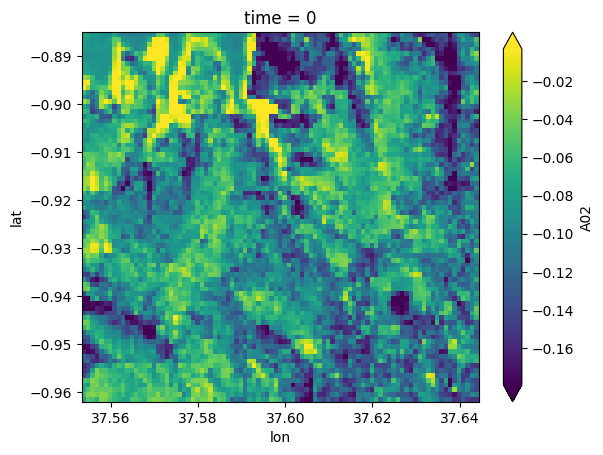

In [21]:
# visualization of the dataset
ds.A02.plot(
    x = "lon",
    y = "lat",
    robust = True
)

In [24]:
# Unsupervised classification using K-Means Clustering
df = ds.to_dataframe()
df

A00       A01       A02       A03       A04  \
time lon       lat                                                           
0    37.553829 -0.961445  0.153787  0.113741 -0.079723 -0.079723  0.008858   
               -0.960445  0.141730  0.124567 -0.059116 -0.079723 -0.000984   
               -0.959445  0.141730  0.103406 -0.071111 -0.055363  0.012057   
               -0.958445  0.160000  0.079723 -0.071111 -0.013841  0.032541   
               -0.957445  0.186082  0.071111 -0.055363 -0.015748  0.022207   
...                            ...       ...       ...       ...       ...   
     37.643829 -0.889445  0.038447  0.206936 -0.032541 -0.192910 -0.103406   
               -0.888445  0.044844  0.179377 -0.098424 -0.147697 -0.079723   
               -0.887445  0.029773  0.244152 -0.071111 -0.186082 -0.108512   
               -0.886445  0.027128  0.192910 -0.055363 -0.153787 -0.084214   
               -0.885445  0.044844  0.141730 -0.147697 -0.135886 -0.079723   

                               A05       A06       A07       A08       A09  \
time lon       lat                                                           
0    37.553829 -0.961445 -0.015748 -0.075356  0.113741  0.017778 -0.251965   
               -0.960445 -0.010396 -0.071111  0.113741  0.006151 -0.244152   
               -0.959445 -0.010396 -0.075356  0.119093  0.006151 -0.236463   
               -0.958445 -0.029773 -0.066990  0.084214  0.066990 -0.214133   
               -0.957445 -0.015748 -0.066990  0.071111  0.048228 -0.214133   
...                            ...       ...       ...       ...       ...   
     37.643829 -0.889445  0.071111 -0.012057  0.172795  0.041584 -0.327812   
               -0.888445  0.059116 -0.019931  0.214133 -0.006151 -0.327812   
               -0.887445  0.098424 -0.022207  0.172795 -0.027128 -0.318893   
               -0.886445  0.113741 -0.032541  0.179377 -0.041584 -0.267958   
               -0.885445  0.093564 -0.035433  0.206936 -0.098424 -0.259900   

                          ...       A54       A55       A56       A57  \
time lon       lat        ...                                           
0    37.553829 -0.961445  ... -0.044844  0.135886  0.075356 -0.093564   
               -0.960445  ... -0.035433  0.160000  0.075356 -0.059116   
               -0.959445  ... -0.032541  0.166336  0.071111 -0.051734   
               -0.958445  ... -0.017778  0.166336  0.051734 -0.071111   
               -0.957445  ... -0.001538  0.153787  0.066990 -0.071111   
...                       ...       ...       ...       ...       ...   
     37.643829 -0.889445  ... -0.038447  0.075356  0.103406 -0.019931   
               -0.888445  ... -0.044844  0.071111  0.119093 -0.019931   
               -0.887445  ... -0.032541  0.048228  0.113741 -0.000062   
               -0.886445  ... -0.055363  0.024606  0.113741  0.038447   
               -0.885445  ... -0.079723  0.019931  0.135886 -0.003014   

                               A58       A59       A60       A61       A62  \
time lon       lat                                                           
0    37.553829 -0.961445 -0.292872 -0.041584  0.007443  0.075356  0.019931   
               -0.960445 -0.301423 -0.032541  0.001538  0.066990  0.019931   
               -0.959445 -0.318893 -0.041584  0.013841  0.079723  0.022207   
               -0.958445 -0.318893 -0.059116  0.019931  0.098424  0.017778   
               -0.957445 -0.327812 -0.048228  0.035433  0.084214  0.032541   
...                            ...       ...       ...       ...       ...   
     37.643829 -0.889445 -0.192910  0.019931 -0.029773  0.027128  0.022207   
               -0.888445 -0.228897  0.000000  0.000000  0.001538  0.022207   
               -0.887445 -0.186082 -0.010396 -0.022207 -0.015748  0.044844   
               -0.886445 -0.199862  0.003937  0.003937  0.044844  0.071111   
               -0.885445 -0.199862 -0.059116  0.035433  0.035433  0.066990   

                               A63  

In [25]:
from sklearn.cluster import KMeans
import numpy as np

In [26]:
model = KMeans(n_clusters = 6, random_state=42)
model.fit(df)

KMeans(n_clusters=6, random_state=42)

In [27]:
df["cluster"] = model.predict(df,)

In [30]:
dx = df.to_xarray().sortby(["lat", "lon"])
dx

<xarray.Dataset> Size: 2MB
Dimensions:  (time: 1, lon: 91, lat: 77)
Coordinates:
  * time     (time) int64 8B 0
  * lon      (lon) float64 728B 37.55 37.55 37.56 37.56 ... 37.64 37.64 37.64
  * lat      (lat) float64 616B -0.9614 -0.9604 -0.9594 ... -0.8864 -0.8854
Data variables: (12/65)
    A00      (time, lon, lat) float32 28kB 0.1538 0.1417 ... 0.02713 0.04484
    A01      (time, lon, lat) float32 28kB 0.1137 0.1246 ... 0.1929 0.1417
    A02      (time, lon, lat) float32 28kB -0.07972 -0.05912 ... -0.1477
    A03      (time, lon, lat) float32 28kB -0.07972 -0.07972 ... -0.1538 -0.1359
    A04      (time, lon, lat) float32 28kB 0.008858 -0.0009842 ... -0.07972
    A05      (time, lon, lat) float32 28kB -0.01575 -0.0104 ... 0.1137 0.09356
    ...       ...
    A59      (time, lon, lat) float32 28kB -0.04158 -0.03254 ... -0.05912
    A60      (time, lon, lat) float32 28kB 0.007443 0.001538 ... 0.03543
    A61      (time, lon, lat) float32 28kB 0.07536 0.06699 ... 0.04484 0.03543
    A62      (time, lon, lat) float32 28kB 0.01993 0.01993 ... 0.07111 0.06699
    A63      (time, lon, lat) float32 28kB -0.01993 -0.02461 ... -0.09356
    cluster  (time, lon, lat) int32 28kB 2 2 2 0 0 4 4 4 4 ... 3 3 3 3 3 3 3 3 1

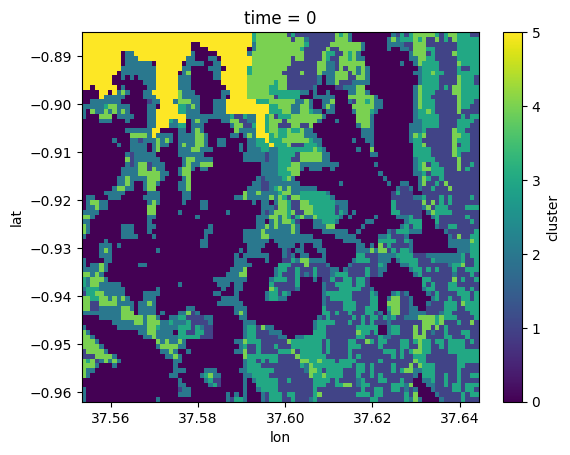

In [31]:
dx.cluster.plot(
    x = "lon",
    y = "lat",
    vmin = 0,
    vmax = 5,

)

In [37]:

output =  dx.cluster.isel(time = 0).drop_vars("time")
output = output.rio.write_crs("EPSG:4326", inplace = True)
output = output.rio.set_spatial_dims(x_dim = "lon", y_dim = "lat", inplace = True)
output = output.rio.write_coordinate_system(inplace = True)
output = output.transpose("lat", "lon")
output = output.rio.to_raster("embedding_cluster.tif")
output